# Stratified Sampler

In [14]:
# Automatically reload modules
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from hmpinn.samplers import InteriorSampler, BoundarySampler
import torch
import warnings

In [16]:
# Old samplers
#A function that creates the data to train the model
def create_data(batch_size = 128,  seed=None):
    """
    Create the data to train the model

    Parameters:
    batch_size (int): The size of each batch
    seed (int): The seed to use for the random number generator

    Returns:
    torch.Tensor: The data to train the model
    """
    if seed is not None:
        torch.manual_seed(seed)
    return torch.rand(batch_size, 2, requires_grad=True)

# Random boundary points using torch
def create_boundary_data(batch_size):
    """
    Create the boundary data to train the model

    Parameters:
    batch_size (int): The size of each batch (preferably a multiple of 4)

    Returns:
    torch.Tensor: The data to train the model    
    """
    if batch_size % 4 != 0:
        warnings.warn("It is recommended to use a batch size that is a multiple of 4")
    size_per_edge = batch_size//4
    x0 = torch.cat((torch.zeros(size_per_edge, 1), torch.rand(size_per_edge, 1)), 1)
    x1 = torch.cat((torch.ones(size_per_edge, 1), torch.rand(size_per_edge, 1)), 1)
    y0 = torch.cat((torch.rand(size_per_edge, 1), torch.zeros(size_per_edge, 1)), 1)
    y1 = torch.cat((torch.rand(size_per_edge, 1), torch.ones(size_per_edge, 1)), 1)
    return torch.cat((x0, x1, y0, y1)).requires_grad_(True)

## Interior point sampler

### Without weighted sampling

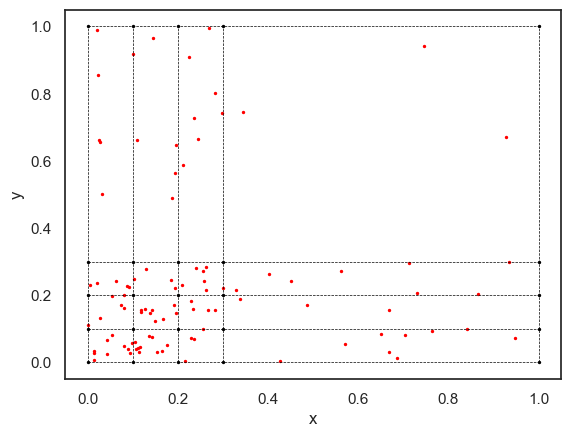

In [17]:
interior_point_sampler = InteriorSampler(x_grid=[0.1, 0.2, 0.3], y_grid=[0.1, 0.2, 0.3])
interior_point_sampler.plot_grid(show_random_sample=True, weighted_sample=False)

### With weighted sampling

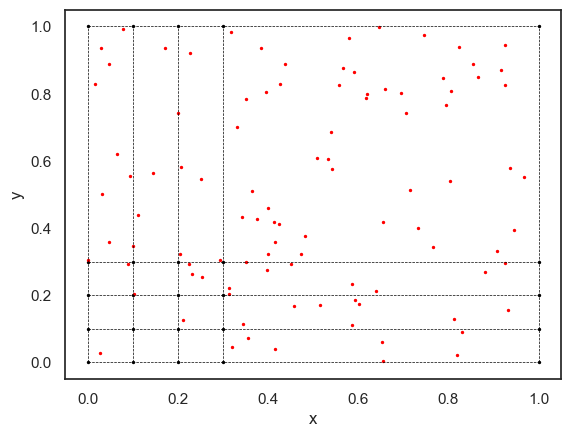

In [18]:
interior_point_sampler.plot_grid(show_random_sample=True, weighted_sample=True)

In [19]:
# It acts the same as the older sampling method
batch_size = 8
print(create_data(batch_size))
print(interior_point_sampler.sample_batch(8.0))
print(interior_point_sampler.default_batch_size)

tensor([[0.0996, 0.4309],
        [0.5108, 0.7570],
        [0.9047, 0.8386],
        [0.7201, 0.2705],
        [0.1429, 0.0527],
        [0.5248, 0.9849],
        [0.4050, 0.4790],
        [0.1367, 0.6535]], requires_grad=True)
tensor([[0.3496, 0.7464],
        [0.1874, 0.4297],
        [0.7929, 0.7377],
        [0.4735, 0.6714],
        [0.2329, 0.0937],
        [0.8070, 0.5234],
        [0.5204, 0.5600],
        [0.7423, 0.9516]], requires_grad=True)
128


## Boundary point sampler

### Without weighted sampling

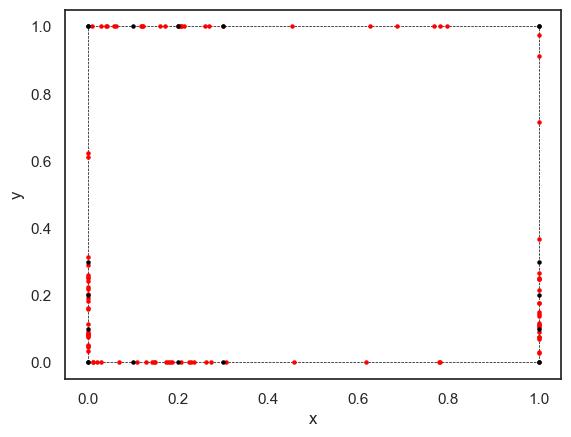

In [20]:
boundary_point_sampler = BoundarySampler(x_grid=[0.1, 0.2, 0.3], y_grid=[0.1, 0.2, 0.3], default_batch_size=10)
boundary_point_sampler.plot_grid(show_random_sample=True, weighted_sample=False)

### With weighted sampling

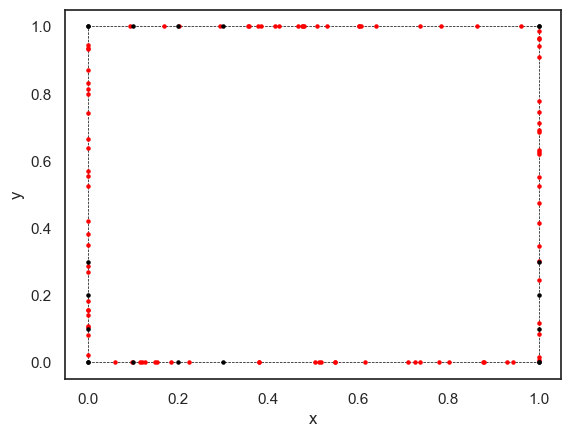

In [21]:
boundary_point_sampler.plot_grid(show_random_sample=True, weighted_sample=True)

In [22]:
# It acts the same as the older sampling method
batch_size = 8
print(create_boundary_data(batch_size))
print(boundary_point_sampler.sample_batch(2))
print(boundary_point_sampler.default_batch_size)


tensor([[0.0000, 0.9368],
        [0.0000, 0.5668],
        [1.0000, 0.3140],
        [1.0000, 0.8666],
        [0.2152, 0.0000],
        [0.5165, 0.0000],
        [0.6124, 1.0000],
        [0.7244, 1.0000]], requires_grad=True)
tensor([[0.6094, 1.0000],
        [1.0000, 0.3516]], requires_grad=True)
10


## Default values

## Interior point sampler

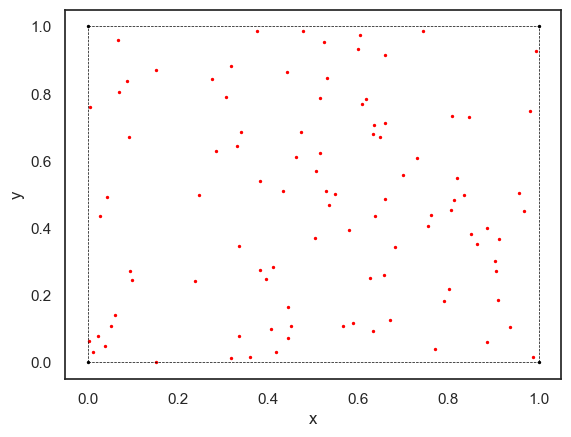

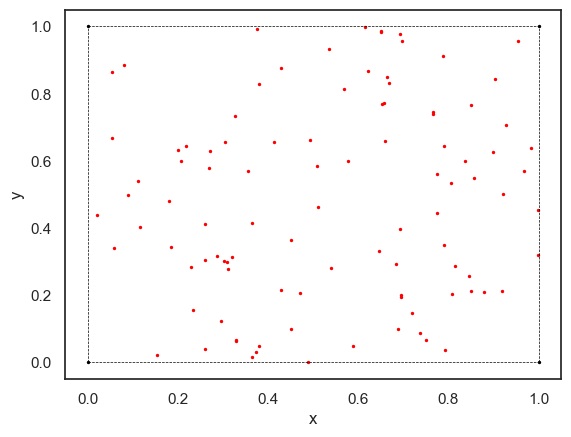

In [23]:
interior_point_sampler = InteriorSampler()
interior_point_sampler.plot_grid(show_random_sample=True, weighted_sample=True)
interior_point_sampler.plot_grid(show_random_sample=True, weighted_sample=False)

## Boundary point sampler

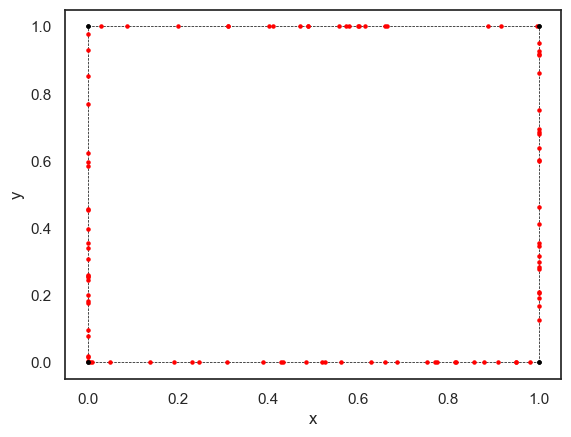

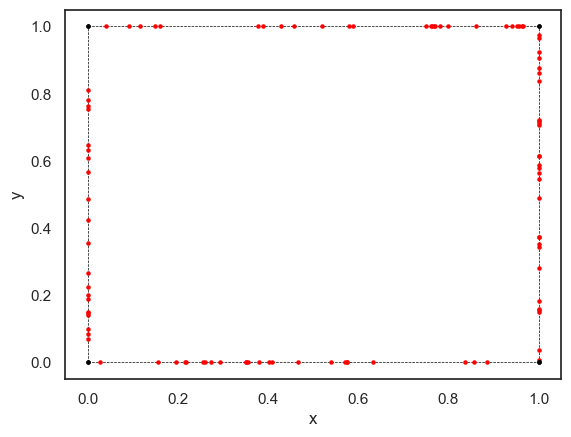

In [24]:
boundary_point_sampler = BoundarySampler()
boundary_point_sampler.plot_grid(show_random_sample=True, weighted_sample=True)
boundary_point_sampler.plot_grid(show_random_sample=True, weighted_sample=False)

## Testing seed

## Interior point sampler

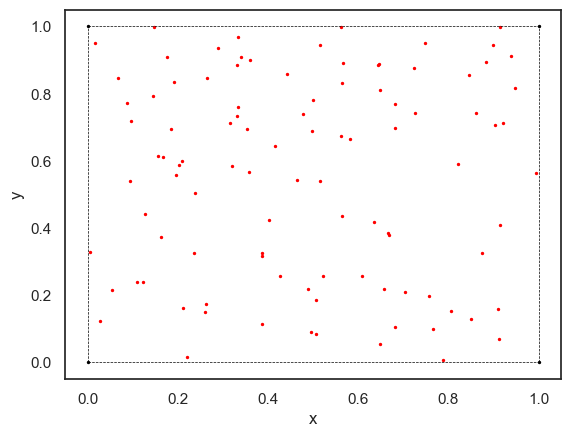

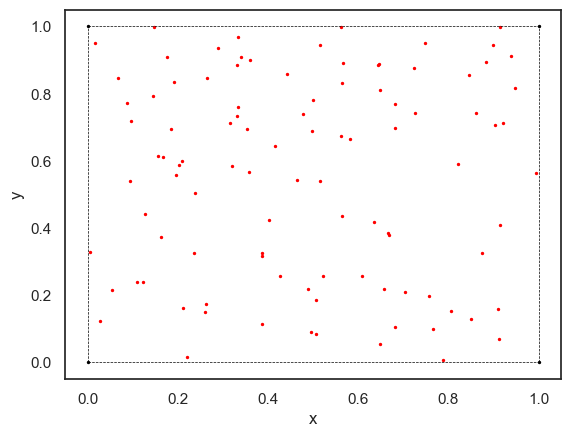

In [25]:
interior_point_sampler = InteriorSampler()
interior_point_sampler.plot_grid(show_random_sample=True, weighted_sample=True, seed=0)
interior_point_sampler.plot_grid(show_random_sample=True, weighted_sample=False, seed=0)

## Boundary point sampler

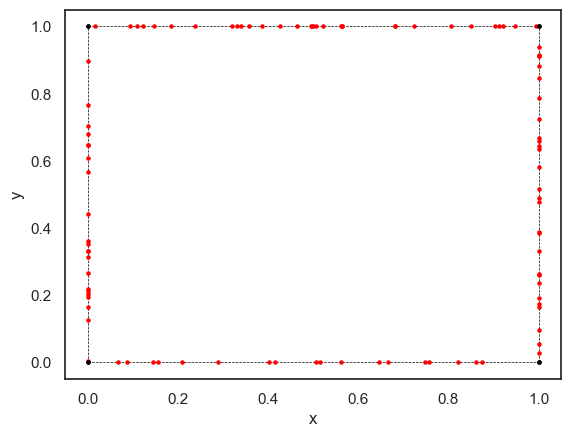

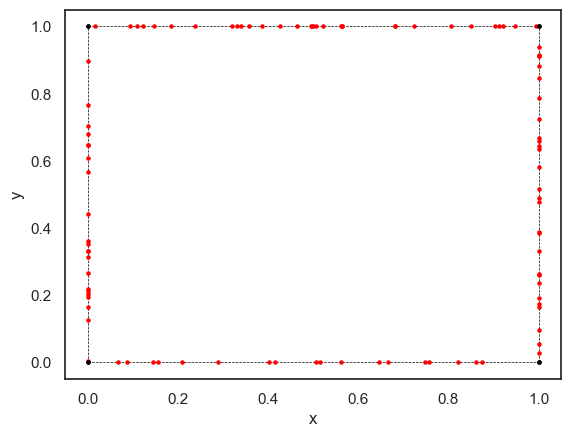

In [26]:
boundary_point_sampler = BoundarySampler()
boundary_point_sampler.plot_grid(show_random_sample=True, weighted_sample=True, seed=0)
boundary_point_sampler.plot_grid(show_random_sample=True, weighted_sample=False, seed=0)